In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip


--2024-09-24 16:10:58--  https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/v0.9.2 [following]
--2024-09-24 16:10:59--  https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/v0.9.2
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.9.2.zip’

v0.9.2.zip              [  <=>               ]   4.17M  17.1MB/s    in 0.2s    

2024-09-24 16:10:59 (17.1 MB/s) - ‘v0.9.2.zip’ saved [4369852]



In [ ]:
!unzip v0.9.2.zip


Archive:  v0.9.2.zip
5b5943c118b0ec5fb9cd8d20587de2b2d3966dfe
   creating: fastText-0.9.2/
   creating: fastText-0.9.2/.circleci/
  inflating: fastText-0.9.2/.circleci/cmake_test.sh  
  inflating: fastText-0.9.2/.circleci/config.yml  
  inflating: fastText-0.9.2/.circleci/gcc_test.sh  
  inflating: fastText-0.9.2/.circleci/pip_test.sh  
  inflating: fastText-0.9.2/.circleci/pull_data.sh  
  inflating: fastText-0.9.2/.circleci/python_test.sh  
  inflating: fastText-0.9.2/.circleci/run_locally.sh  
  inflating: fastText-0.9.2/.circleci/setup_circleimg.sh  
  inflating: fastText-0.9.2/.circleci/setup_debian.sh  
  inflating: fastText-0.9.2/.gitignore  
  inflating: fastText-0.9.2/CMakeLists.txt  
  inflating: fastText-0.9.2/CODE_OF_CONDUCT.md  
  inflating: fastText-0.9.2/CONTRIBUTING.md  
  inflating: fastText-0.9.2/LICENSE  
  inflating: fastText-0.9.2/MANIFEST.in  
  inflating: fastText-0.9.2/Makefile  
  inflating: fastText-0.9.2/README.md  
   creating: fastText-0.9.2/alignment/
  in

In [ ]:
import os
os.chdir('fastText-0.9.2')


In [ ]:
!pip install .


Processing /content/fastText-0.9.2
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4284363 sha256=e71ebae6b3811ceea1260881e2d082eebb03a13b1a69a0017b77fde60e99c681
  Stored in directory: /root/.cache/pip/wheels/33/76/e2/3c2d079df7dbb2be6b6e57116e33ee5f5ca2fa28762e3299b2
Successfully built fasttext


In [ ]:
import os

# Check the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Change to the home directory
home_directory = os.path.expanduser("~")
os.chdir(home_directory)

# Verify the change
new_directory = os.getcwd()
print("New Directory:", new_directory)


Current Directory: /root
New Directory: /root


In [ ]:
import pandas as pd

In [ ]:
# Change the working directory
os.chdir('/content')

# Verify the change
new_directory = os.getcwd()
print("New Directory:", new_directory)




New Directory: /content


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Remove empty columns
df = df.dropna(axis=1, how='all')

# # Drop any rows with empty 'Pattern String' or 'classification'
# df = df.dropna(subset=['Pattern String', 'classification'])

# # Ensure the classification labels are in the required format for FastText
# df['classification'] = df['classification'].apply(lambda x: f'__label__{x}')

# # Save the preprocessed data to a new file
# df.to_csv('preprocessed_data.txt', index=False, header=False, sep=' ')

# # The file is now ready for FastText training


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Ethify_Dataset.csv')

# Remove empty columns
df = df.dropna(axis=1, how='all')

# Drop any rows with empty 'Pattern String' or 'classification'
df = df.dropna(subset=['Pattern String', 'classification'])

# Ensure the classification labels are in the required format for FastText
df['classification'] = df['classification'].apply(lambda x: f'__label__{x}')

# Combine 'classification' with 'Pattern String' for FastText format
df['text'] = df['classification'] + ' ' + df['Pattern String']

# Save the preprocessed data to a new file
df[['text']].to_csv('preprocessed_data.txt', index=False, header=False, sep=' ')

# The file is now ready for FastText training


In [ ]:
import fasttext

# Step 1: Prepare the dataset
# Ensure your dataset is in 'data.txt' with the format: "Pattern String\tclassification"

# Preprocessing function
def preprocess_data(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for line in infile:
            pattern, label = line.strip().split('\t')
            label = f'__label__{label}'  # FastText requires label prefix
            outfile.write(f"{label} {pattern}\n")

# Preprocess the data
preprocess_data("preprocessed_data.txt", "data.preprocessed.txt")

# Step 2: Split the data into training and validation sets
!head -n 12404 data.preprocessed.txt > data.train
!tail -n 3000 data.preprocessed.txt > data.valid

# Step 3: Train the FastText model with word n-grams and hierarchical softmax
model = fasttext.train_supervised(
    input="data.train",
    lr=0.5,               # Adjust learning rate
    epoch=25,             # Increase number of epochs
    wordNgrams=2,        # Use bigrams
    bucket=200000,        # Set bucket size
    dim=50,               # Set embedding dimension
    loss='ova'            # Use one-vs-all for multi-label classification
)

# Step 4: Save the model
model.save_model("model_dark_pattern.bin")

# Step 5: Test the model
results = model.test("data.valid", k=-1)  # Evaluate with all possible predictions
print(f"Number of samples: {results.nsample}")
print(f"Precision: {results.precision:.3f}")
print(f"Recall: {results.recall:.3f}")

# Step 6: Make predictions with thresholding
example_text = "Your example text goes here."
predicted_labels, probabilities = model.predict(example_text, k=-1, threshold=0.5)
for label, prob in zip(predicted_labels, probabilities):
    print(f"Predicted label: {label}, Probability: {prob:.3f}")


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
def preprocess_data(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for line in infile:
            line = line.strip()
            if not line:  # Skip empty lines
                continue

            # Split the line based on space
            parts = line.split(' ')
            if len(parts) < 2:  # Ensure there are at least two parts (label and pattern)
                continue

            label = parts[0]  # First part is the label
            pattern = ' '.join(parts[1:])  # Join the rest as the pattern

            outfile.write(f"{label} {pattern}\n")

# Call the preprocess function
preprocess_data("preprocessed_data.txt", "data.preprocessed.txt")


In [ ]:
import pandas as pd
import fasttext

# Step 1: Load your dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Step 2: Replace spaces in column names with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Step 3: Replace 0 with 'no' and 1 with 'yes' in the classification column
df['classification'] = df['classification'].replace({0: 'no', 1: 'yes'})

# Step 4: Ensure the data has the correct columns
assert 'Pattern_String' in df.columns and 'classification' in df.columns

# Step 5: Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Step 6: Create a FastText compatible format
df['fasttext_format'] = df.apply(lambda row: f"__label__{row['classification']} {row['Pattern_String']}", axis=1)

# Step 7: Split the dataset into 70% training and 30% validation sets
train_size = int(0.7 * len(df))
train_df = df[:train_size]
valid_df = df[train_size:]

# Save the training and validation data to text files
train_df['fasttext_format'].to_csv('train.txt', index=False, header=False)
valid_df['fasttext_format'].to_csv('valid.txt', index=False, header=False)

# Step 8: Train the FastText model with word n-grams and hierarchical softmax
model = fasttext.train_supervised(
    input="train.txt",
    lr=0.5,               # Adjust learning rate
    epoch=25,             # Increase number of epochs
    wordNgrams=2,        # Use bigrams
    bucket=200000,        # Set bucket size
    dim=50,               # Set embedding dimension
    loss='ova'            # Use one-vs-all for multi-label classification
)

# Step 9: Save the model
model.save_model("model_dark_pattern.bin")

# Step 10: Test the model on the validation set
results = model.test("valid.txt")
num_samples, precision, recall = results

print(f"Number of samples: {num_samples}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Step 11: Make predictions with thresholding
example_text = "Your example text goes here."
predicted_labels, probabilities = model.predict(example_text, k=-1, threshold=0.5)
for label, prob in zip(predicted_labels, probabilities):
    print(f"Predicted label: {label}, Probability: {prob:.3f}")


Number of samples: 957
Precision: 0.836
Recall: 0.836
Predicted label: __label__no, Probability: 0.686


In [ ]:
import pandas as pd
import fasttext

# Step 1: Load your dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Step 2: Replace spaces in column names with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Step 3: Replace 0 with 'no' and 1 with 'yes' in the classification column
df['classification'] = df['classification'].replace({0: 'no', 1: 'yes'})

# Step 4: Ensure the data has the correct columns
assert 'Pattern_String' in df.columns and 'classification' in df.columns

# Step 5: Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Step 6: Create a FastText compatible format
df['fasttext_format'] = df.apply(lambda row: f"__label__{row['classification']} {row['Pattern_String']}", axis=1)

# Step 7: Split the dataset into 70% training, 15% validation, and 15% test sets
train_size = int(0.7 * len(df))
valid_size = int(0.15 * len(df))

train_df = df[:train_size]
valid_df = df[train_size:train_size + valid_size]
test_df = df[train_size + valid_size:]

# Save the training, validation, and test data to text files
train_df['fasttext_format'].to_csv('train.txt', index=False, header=False)
valid_df['fasttext_format'].to_csv('valid.txt', index=False, header=False)
test_df['fasttext_format'].to_csv('test.txt', index=False, header=False)

# Step 8: Train the FastText model with autotune
# Set autotune duration to 10 minutes (600 seconds)
model = fasttext.train_supervised(
    input="train.txt",
    autotuneValidationFile="valid.txt",  # Validation file for tuning
    autotuneDuration=180                 # Autotune for 10 minutes
)

# Step 9: Save the model
model.save_model("model_dark_pattern_autotune.bin")

# Step 10: Test the model on the validation set (after hyperparameter tuning)
valid_results = model.test("valid.txt")
valid_num_samples, valid_precision, valid_recall = valid_results

print("Validation Results:")
print(f"Number of samples: {valid_num_samples}")
print(f"Precision: {valid_precision:.3f}")
print(f"Recall: {valid_recall:.3f}")

# Step 11: Test the model on the test dataset (for final evaluation)
test_results = model.test("test.txt")
test_num_samples, test_precision, test_recall = test_results

print("\nTest Results:")
print(f"Number of samples: {test_num_samples}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall: {test_recall:.3f}")

# Step 12: Make predictions with thresholding
example_text = "Your example text goes here."
predicted_labels, probabilities = model.predict(example_text, k=-1, threshold=0.5)
for label, prob in zip(predicted_labels, probabilities):
    print(f"Predicted label: {label}, Probability: {prob:.3f}")


Validation Results:
Number of samples: 481
Precision: 0.873
Recall: 0.873

Test Results:
Number of samples: 468
Precision: 0.844
Recall: 0.844
Predicted label: __label__yes, Probability: 0.538


In [ ]:
# Step 12: Make predictions with thresholding
example_text = "Bought by 200 users this week"
predicted_labels, probabilities = model.predict(example_text, k=-1, threshold=0.5)
for label, prob in zip(predicted_labels, probabilities):
    print(f"Predicted label: {label}, Probability: {prob:.3f}")

Predicted label: __label__yes, Probability: 0.896


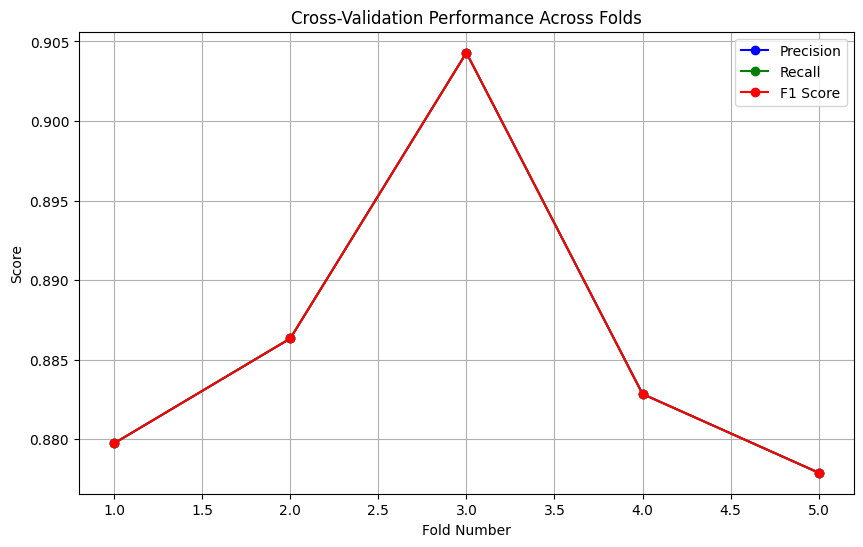

Average Precision: 0.886
Average Recall: 0.886
Average F1 Score: 0.886


In [ ]:
import pandas as pd
import fasttext
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import os

# Load your dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Replace spaces in column names with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Check for missing values and drop rows if necessary
df.dropna(subset=['Pattern_String', 'classification'], inplace=True)

# Replace 0 with 'no' and 1 with 'yes' in the classification column
df['classification'] = df['classification'].replace({0: 'no', 1: 'yes'})

# Ensure the data has the correct columns
if 'Pattern_String' not in df.columns or 'classification' not in df.columns:
    raise ValueError("Dataset must contain 'Pattern_String' and 'classification' columns.")

# Create FastText compatible format
df['fasttext_format'] = df.apply(lambda row: f"__label__{row['classification']} {row['Pattern_String']}", axis=1)

# Stratified K-Fold Cross-Validation Setup (5 folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = df['fasttext_format'].values
y = df['classification'].values  # Not used by FastText but necessary for KFold

# Store results
precisions, recalls, f1s = [], [], []

# Iterate over each fold for cross-validation
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    # Create train/valid files for FastText
    train_file = f"train_fold{fold_idx}.txt"
    valid_file = f"valid_fold{fold_idx}.txt"

    # Write the folds to text files
    with open(train_file, 'w') as f_train, open(valid_file, 'w') as f_valid:
        for i in train_idx:
            f_train.write(f"{X[i]}\n")
        for i in valid_idx:
            f_valid.write(f"{X[i]}\n")

    # Train FastText model on the current fold
    model = fasttext.train_supervised(
        input=train_file,
        epoch=25,  # Number of training epochs
        lr=0.5,    # Learning rate
        wordNgrams=2,  # Use bigrams
        dim=50     # Embedding dimension
    )

    # Test the model on the validation set
    result = model.test(valid_file)

    # Save the results (result = tuple of nsample, precision, recall)
    precisions.append(result[1])
    recalls.append(result[2])
    f1s.append(2 * (result[1] * result[2]) / (result[1] + result[2]) if result[1] + result[2] != 0 else 0)

    # Cleanup temporary files
    os.remove(train_file)
    os.remove(valid_file)

# Plotting the results
folds = list(range(1, len(precisions) + 1))

plt.figure(figsize=(10, 6))
plt.plot(folds, precisions, label='Precision', marker='o', linestyle='-', color='blue')
plt.plot(folds, recalls, label='Recall', marker='o', linestyle='-', color='green')
plt.plot(folds, f1s, label='F1 Score', marker='o', linestyle='-', color='red')

# Add labels and titles
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-Validation Performance Across Folds')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Print the average scores across all folds
print(f"Average Precision: {sum(precisions) / len(precisions):.3f}")
print(f"Average Recall: {sum(recalls) / len(recalls):.3f}")
print(f"Average F1 Score: {sum(f1s) / len(f1s):.3f}")


In [ ]:
import pandas as pd
import fasttext
from sklearn.model_selection import StratifiedKFold
import os

# Load your dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Replace spaces in column names with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Check for missing values and drop rows if necessary
df.dropna(subset=['Pattern_String', 'classification'], inplace=True)

# Replace 0 with 'no' and 1 with 'yes' in the classification column
df['classification'] = df['classification'].replace({0: 'no', 1: 'yes'})

# Ensure the data has the correct columns
if 'Pattern_String' not in df.columns or 'classification' not in df.columns:
    raise ValueError("Dataset must contain 'Pattern_String' and 'classification' columns.")

# Create FastText compatible format
df['fasttext_format'] = df.apply(lambda row: f"__label__{row['classification']} {row['Pattern_String']}", axis=1)

# Stratified K-Fold Cross-Validation Setup (5 folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = df['fasttext_format'].values
y = df['classification'].values  # Not used by FastText but necessary for KFold

# Store metrics for fold 3
fold_3_metrics = {}
model = None

# Iterate over each fold for cross-validation
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    # Create train/valid files for FastText
    train_file = f"train_fold{fold_idx}.txt"
    valid_file = f"valid_fold{fold_idx}.txt"

    # Write the folds to text files
    with open(train_file, 'w') as f_train, open(valid_file, 'w') as f_valid:
        for i in train_idx:
            f_train.write(f"{X[i]}\n")
        for i in valid_idx:
            f_valid.write(f"{X[i]}\n")

    # Train FastText model on the current fold
    model = fasttext.train_supervised(
        input=train_file,
        epoch=25,  # Number of training epochs
        lr=0.5,    # Learning rate
        wordNgrams=2,  # Use bigrams
        dim=50     # Embedding dimension
    )

    # Test the model on the validation set
    result = model.test(valid_file)

    # Store metrics for fold 3
    if fold_idx == 2:  # fold_idx is 0-based, so fold 3 is index 2
        fold_3_metrics['precision'] = result[1]
        fold_3_metrics['recall'] = result[2]
        fold_3_metrics['f1_score'] = 2 * (result[1] * result[2]) / (result[1] + result[2]) if result[1] + result[2] != 0 else 0

        model.save_model("fasttext_model_fold3.bin")
    # Cleanup temporary files
    os.remove(train_file)
    os.remove(valid_file)

# Print the metrics for fold 3
print("Metrics for Fold 3:")
print(f"Precision: {fold_3_metrics['precision']:.3f}")
print(f"Recall: {fold_3_metrics['recall']:.3f}")
print(f"F1 Score: {fold_3_metrics['f1_score']:.3f}")

# Testing the model with random text examples
random_texts = [
    "This website tries to trick you into purchasing something.",
    "The offer seems too good to be true.",
    "I had a great experience with this online store.",
    "This is an"
]

for text in random_texts:
    # Predict the label
    label, probability = model.predict(text)
    print(f"Text: '{text}' | Predicted Label: {label[0]} | Probability: {probability[0]:.4f}")


Metrics for Fold 3:
Precision: 0.904
Recall: 0.904
F1 Score: 0.904
Text: 'This website tries to trick you into purchasing something.' | Predicted Label: __label__yes | Probability: 0.8434
Text: 'The offer seems too good to be true.' | Predicted Label: __label__no | Probability: 0.7353
Text: 'I had a great experience with this online store.' | Predicted Label: __label__yes | Probability: 0.9886
Text: 'This is an' | Predicted Label: __label__no | Probability: 0.5027


In [ ]:
# Testing the model with random text examples
random_texts = [
    "This website tries to trick you into purchasing something.",
    "The offer seems too good to be true.",
    "I had a great experience with this online store.",
    "This is an example test",
    "200 people bought this last week",
    "Best in segment",
]

for text in random_texts:
    # Predict the label
    label, probability = model.predict(text)
    print(f"Text: '{text}' | Predicted Label: {label[0]} | Probability: {probability[0]:.4f}")


Text: 'This website tries to trick you into purchasing something.' | Predicted Label: __label__yes | Probability: 0.8434
Text: 'The offer seems too good to be true.' | Predicted Label: __label__no | Probability: 0.7353
Text: 'I had a great experience with this online store.' | Predicted Label: __label__yes | Probability: 0.9886
Text: 'This is an example test' | Predicted Label: __label__no | Probability: 0.5021
Text: '200 people bought this last week' | Predicted Label: __label__yes | Probability: 0.9998
Text: 'Best in segment' | Predicted Label: __label__yes | Probability: 0.9098


Doing Augmentation


In [ ]:
import nltk

# Download the WordNet corpus
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


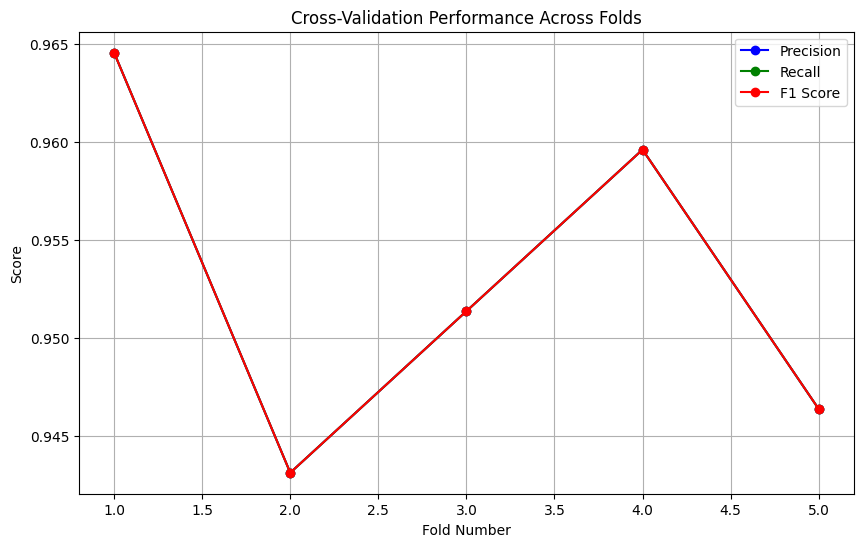

Average Precision: 0.953
Average Recall: 0.953
Average F1 Score: 0.953


In [ ]:
import pandas as pd
import fasttext
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import wordnet
import random

# Download WordNet
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Replace spaces in column names with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Check for missing values and drop rows if necessary
df.dropna(subset=['Pattern_String', 'classification'], inplace=True)

# Replace 0 with 'no' and 1 with 'yes' in the classification column
df['classification'] = df['classification'].replace({0: 'no', 1: 'yes'})

# Ensure the data has the correct columns
if 'Pattern_String' not in df.columns or 'classification' not in df.columns:
    raise ValueError("Dataset must contain 'Pattern_String' and 'classification' columns.")

# Function to perform synonym replacement
def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word_list = list(set(new_words))  # Get unique words to avoid duplication
        if not word_list:  # Skip if no words left
            break
        random_word = random.choice(word_list)
        synonyms = wordnet.synsets(random_word)
        if synonyms:  # Check if there are synonyms available
            synonym = synonyms[0].lemmas()[0].name()  # Get the first synonym
            if synonym != random_word:
                new_words = [synonym if word == random_word else word for word in new_words]
    return ' '.join(new_words)

# Apply synonym replacement to augment the dataset
augmented_texts = df['Pattern_String'].apply(synonym_replacement)

# Combine original and augmented texts
combined_texts = pd.concat([df['Pattern_String'], augmented_texts], ignore_index=True)
combined_labels = pd.concat([df['classification'], df['classification']], ignore_index=True)

# Create FastText compatible format for combined dataset
fasttext_format = combined_texts.apply(lambda text: f"__label__{combined_labels.iloc[combined_texts.index[combined_texts == text][0]]} {text}")

# Stratified K-Fold Cross-Validation Setup (5 folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = fasttext_format.values
y = combined_labels.values  # Not used by FastText but necessary for KFold

# Store results
precisions, recalls, f1s = [], [], []

# Iterate over each fold for cross-validation
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    # Create train/valid files for FastText
    train_file = f"train_fold{fold_idx}.txt"
    valid_file = f"valid_fold{fold_idx}.txt"

    # Write the folds to text files
    with open(train_file, 'w') as f_train, open(valid_file, 'w') as f_valid:
        for i in train_idx:
            f_train.write(f"{X[i]}\n")
        for i in valid_idx:
            f_valid.write(f"{X[i]}\n")

    # Train FastText model on the current fold
    model = fasttext.train_supervised(
        input=train_file,
        epoch=25,  # Number of training epochs
        lr=0.5,    # Learning rate
        wordNgrams=2,  # Use bigrams
        dim=50     # Embedding dimension
    )

    # Test the model on the validation set
    result = model.test(valid_file)

    # Save the results (result = tuple of nsample, precision, recall)
    precisions.append(result[1])
    recalls.append(result[2])
    f1s.append(2 * (result[1] * result[2]) / (result[1] + result[2]) if result[1] + result[2] != 0 else 0)

    # Cleanup temporary files
    os.remove(train_file)
    os.remove(valid_file)

# Plotting the results
folds = list(range(1, len(precisions) + 1))

plt.figure(figsize=(10, 6))
plt.plot(folds, precisions, label='Precision', marker='o', linestyle='-', color='blue')
plt.plot(folds, recalls, label='Recall', marker='o', linestyle='-', color='green')
plt.plot(folds, f1s, label='F1 Score', marker='o', linestyle='-', color='red')

# Add labels and titles
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-Validation Performance Across Folds')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Print the average scores across all folds
print(f"Average Precision: {sum(precisions) / len(precisions):.3f}")
print(f"Average Recall: {sum(recalls) / len(recalls):.3f}")
print(f"Average F1 Score: {sum(f1s) / len(f1s):.3f}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


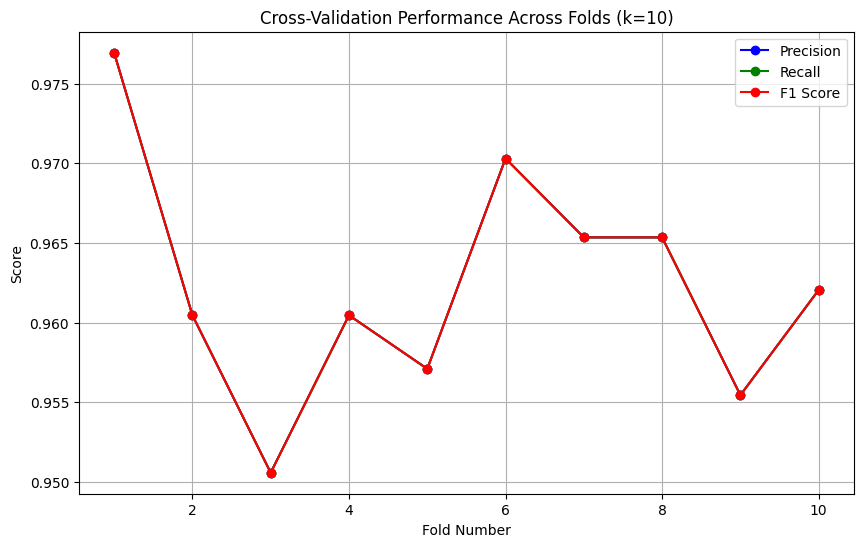

Average Precision: 0.962
Average Recall: 0.962
Average F1 Score: 0.962


In [ ]:
import pandas as pd
import fasttext
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import wordnet
import random

# Download WordNet
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Replace spaces in column names with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Check for missing values and drop rows if necessary
df.dropna(subset=['Pattern_String', 'classification'], inplace=True)

# Replace 0 with 'no' and 1 with 'yes' in the classification column
df['classification'] = df['classification'].replace({0: 'no', 1: 'yes'})

# Ensure the data has the correct columns
if 'Pattern_String' not in df.columns or 'classification' not in df.columns:
    raise ValueError("Dataset must contain 'Pattern_String' and 'classification' columns.")

# Function to perform synonym replacement
def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word_list = list(set(new_words))  # Get unique words to avoid duplication
        if not word_list:  # Skip if no words left
            break
        random_word = random.choice(word_list)
        synonyms = wordnet.synsets(random_word)
        if synonyms:  # Check if there are synonyms available
            synonym = synonyms[0].lemmas()[0].name()  # Get the first synonym
            if synonym != random_word:
                new_words = [synonym if word == random_word else word for word in new_words]
    return ' '.join(new_words)

# Apply synonym replacement to augment the dataset
augmented_texts = df['Pattern_String'].apply(synonym_replacement)

# Combine original and augmented texts
combined_texts = pd.concat([df['Pattern_String'], augmented_texts], ignore_index=True)
combined_labels = pd.concat([df['classification'], df['classification']], ignore_index=True)

# Create FastText compatible format for combined dataset
fasttext_format = combined_texts.apply(lambda text: f"__label__{combined_labels.iloc[combined_texts.index[combined_texts == text][0]]} {text}")

# Stratified K-Fold Cross-Validation Setup (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

X = fasttext_format.values
y = combined_labels.values  # Not used by FastText but necessary for KFold

# Store results
precisions, recalls, f1s = [], [], []

# Iterate over each fold for cross-validation
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    # Create train/valid files for FastText
    train_file = f"train_fold{fold_idx}.txt"
    valid_file = f"valid_fold{fold_idx}.txt"

    # Write the folds to text files
    with open(train_file, 'w') as f_train, open(valid_file, 'w') as f_valid:
        for i in train_idx:
            f_train.write(f"{X[i]}\n")
        for i in valid_idx:
            f_valid.write(f"{X[i]}\n")

    # Train FastText model on the current fold
    model = fasttext.train_supervised(
        input=train_file,
        epoch=25,  # Number of training epochs
        lr=0.5,    # Learning rate
        wordNgrams=2,  # Use bigrams
        dim=50     # Embedding dimension
    )

    # Test the model on the validation set
    result = model.test(valid_file)

    # Save the results (result = tuple of nsample, precision, recall)
    precisions.append(result[1])
    recalls.append(result[2])
    f1s.append(2 * (result[1] * result[2]) / (result[1] + result[2]) if result[1] + result[2] != 0 else 0)

    # Cleanup temporary files
    os.remove(train_file)
    os.remove(valid_file)

# Plotting the results
folds = list(range(1, len(precisions) + 1))

plt.figure(figsize=(10, 6))
plt.plot(folds, precisions, label='Precision', marker='o', linestyle='-', color='blue')
plt.plot(folds, recalls, label='Recall', marker='o', linestyle='-', color='green')
plt.plot(folds, f1s, label='F1 Score', marker='o', linestyle='-', color='red')

# Add labels and titles
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-Validation Performance Across Folds (k=10)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Print the average scores across all folds
print(f"Average Precision: {sum(precisions) / len(precisions):.3f}")
print(f"Average Recall: {sum(recalls) / len(recalls):.3f}")
print(f"Average F1 Score: {sum(f1s) / len(f1s):.3f}")


Saving data to train on best k

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


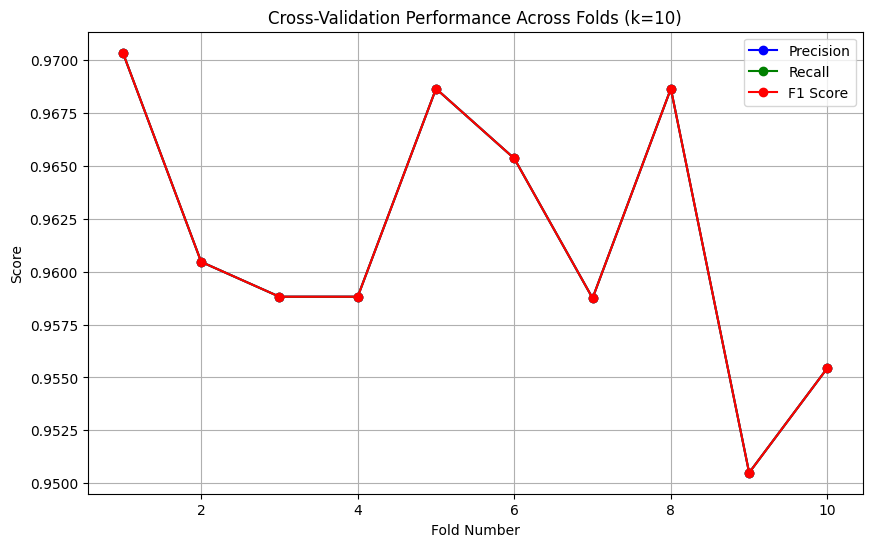

Average Precision: 0.962
Average Recall: 0.962
Average F1 Score: 0.962


In [ ]:
import pandas as pd
import fasttext
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import wordnet
import random

# Download WordNet
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv('Ethify_Dataset.csv')

# Replace spaces in column names with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Check for missing values and drop rows if necessary
df.dropna(subset=['Pattern_String', 'classification'], inplace=True)

# Replace 0 with 'no' and 1 with 'yes' in the classification column
df['classification'] = df['classification'].replace({0: 'no', 1: 'yes'})

# Ensure the data has the correct columns
if 'Pattern_String' not in df.columns or 'classification' not in df.columns:
    raise ValueError("Dataset must contain 'Pattern_String' and 'classification' columns.")

# Function to perform synonym replacement
def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word_list = list(set(new_words))  # Get unique words to avoid duplication
        if not word_list:  # Skip if no words left
            break
        random_word = random.choice(word_list)
        synonyms = wordnet.synsets(random_word)
        if synonyms:  # Check if there are synonyms available
            synonym = synonyms[0].lemmas()[0].name()  # Get the first synonym
            if synonym != random_word:
                new_words = [synonym if word == random_word else word for word in new_words]
    return ' '.join(new_words)

# Apply synonym replacement to augment the dataset
augmented_texts = df['Pattern_String'].apply(synonym_replacement)

# Combine original and augmented texts
combined_texts = pd.concat([df['Pattern_String'], augmented_texts], ignore_index=True)
combined_labels = pd.concat([df['classification'], df['classification']], ignore_index=True)

# Create FastText compatible format for combined dataset
fasttext_format = combined_texts.apply(lambda text: f"__label__{combined_labels.iloc[combined_texts.index[combined_texts == text][0]]} {text}")

# Stratified K-Fold Cross-Validation Setup (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

X = fasttext_format.values
y = combined_labels.values  # Not used by FastText but necessary for KFold

# Store results
precisions, recalls, f1s = [], [], []

# Keep track of file names for each fold
train_files = []
valid_files = []

# Iterate over each fold for cross-validation
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    # Create train/valid files for FastText
    train_file = f"train_fold{fold_idx}.txt"
    valid_file = f"valid_fold{fold_idx}.txt"

    # Write the folds to text files
    with open(train_file, 'w') as f_train, open(valid_file, 'w') as f_valid:
        for i in train_idx:
            f_train.write(f"{X[i]}\n")
        for i in valid_idx:
            f_valid.write(f"{X[i]}\n")

    # Train FastText model on the current fold
    model = fasttext.train_supervised(
        input=train_file,
        epoch=25,  # Number of training epochs
        lr=0.5,    # Learning rate
        wordNgrams=2,  # Use bigrams
        dim=50     # Embedding dimension
    )

    # Test the model on the validation set
    result = model.test(valid_file)

    # Save the results (result = tuple of nsample, precision, recall)
    precisions.append(result[1])
    recalls.append(result[2])
    f1s.append(2 * (result[1] * result[2]) / (result[1] + result[2]) if result[1] + result[2] != 0 else 0)

    # Keep track of train and valid file names
    train_files.append(train_file)
    valid_files.append(valid_file)

# Plotting the results
folds = list(range(1, len(precisions) + 1))

plt.figure(figsize=(10, 6))
plt.plot(folds, precisions, label='Precision', marker='o', linestyle='-', color='blue')
plt.plot(folds, recalls, label='Recall', marker='o', linestyle='-', color='green')
plt.plot(folds, f1s, label='F1 Score', marker='o', linestyle='-', color='red')

# Add labels and titles
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-Validation Performance Across Folds (k=10)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Print the average scores across all folds
print(f"Average Precision: {sum(precisions) / len(precisions):.3f}")
print(f"Average Recall: {sum(recalls) / len(recalls):.3f}")
print(f"Average F1 Score: {sum(f1s) / len(f1s):.3f}")



In [ ]:
# Now, you can use the stored train/valid files to retrain on best k (e.g., k=4)
best_fold = 5  # Suppose this is the best fold from the graph

# Load train and validation files for the best fold
train_file = train_files[best_fold - 1]  # Adjust for 0-indexing
valid_file = valid_files[best_fold - 1]

# Train final model on the selected best fold
best_model = fasttext.train_supervised(
    input=train_file,
    epoch=25,  # Number of training epochs
    lr=0.5,    # Learning rate
    wordNgrams=2,  # Use bigrams
    dim=50     # Embedding dimension
)

# Test the best model on the validation set
result = best_model.test(valid_file)

# Print metrics for the best fold model
print(f"Final Model on Best Fold {best_fold} - Test Set Results:")
print(f"Number of samples: {result[0]}")
print(f"Precision: {result[1]:.4f}")
print(f"Recall: {result[2]:.4f}")
print(f"F1 Score: {2 * (result[1] * result[2]) / (result[1] + result[2]):.4f}")

# Test the best model on random samples
def test_on_random_samples(model, df, n_samples=5):
    random_samples = df.sample(n_samples)
    for index, row in random_samples.iterrows():
        text = row['Pattern_String']
        label = model.predict(text)[0][0]
        print(f"Text: {text}")
        print(f"Predicted Label: {label.replace('__label__', '')}")

# Test the final model on random examples
test_on_random_samples(best_model, df, n_samples=5)



Final Model on Best Fold 5 - Test Set Results:
Number of samples: 606
Precision: 0.9686
Recall: 0.9686
F1 Score: 0.9686
Text: Exterior
Predicted Label: no
Text: Free Optional Nitrogen Tire Fill
Predicted Label: no
Text: CONTACT US
Predicted Label: no
Text: Save 40%
Predicted Label: yes
Text: Rovos Durban Satin Bronze Wheel - 18x10.5 - Rear Only
Predicted Label: no


In [ ]:
# Testing the model with random text examples
random_texts = [
    "This website tries to trick you into purchasing something.",
    "The offer seems too good to be true.",
    "I had a great experience with this online store.",
    "This is an example test",
    "200 people bought this last week",
    "Best in segment",
]

for text in random_texts:
    # Predict the label
    label, probability = model.predict(text)
    print(f"Text: '{text}' | Predicted Label: {label[0]} | Probability: {probability[0]:.4f}")



Text: 'This website tries to trick you into purchasing something.' | Predicted Label: __label__yes | Probability: 0.9739
Text: 'The offer seems too good to be true.' | Predicted Label: __label__yes | Probability: 0.7218
Text: 'I had a great experience with this online store.' | Predicted Label: __label__yes | Probability: 0.9999
Text: 'This is an example test' | Predicted Label: __label__yes | Probability: 0.6206
Text: '200 people bought this last week' | Predicted Label: __label__yes | Probability: 1.0000
Text: 'Best in segment' | Predicted Label: __label__yes | Probability: 0.9918


In [ ]:
# Now, you can use the stored train/valid files to retrain on best k (e.g., k=4)
best_fold = 4  # Suppose this is the best fold from the graph

# Load train and validation files for the best fold
train_file = train_files[best_fold - 1]  # Adjust for 0-indexing
valid_file = valid_files[best_fold - 1]

# Train final model on the selected best fold
best_model = fasttext.train_supervised(
    input=train_file,
    epoch=25,  # Number of training epochs
    lr=0.5,    # Learning rate
    wordNgrams=2,  # Use bigrams
    dim=50     # Embedding dimension
)

# Test the best model on the validation set
result = best_model.test(valid_file)
best_model.save_model("fasttext_k4.bin")

# Print metrics for the best fold model
print(f"Final Model on Best Fold {best_fold} - Test Set Results:")
print(f"Number of samples: {result[0]}")
print(f"Precision: {result[1]:.4f}")
print(f"Recall: {result[2]:.4f}")
print(f"F1 Score: {2 * (result[1] * result[2]) / (result[1] + result[2]):.4f}")

# Test the best model on random samples
def test_on_random_samples(model, df, n_samples=5):
    random_samples = df.sample(n_samples)
    for index, row in random_samples.iterrows():
        text = row['Pattern_String']
        label = model.predict(text)[0][0]
        print(f"Text: {text}")
        print(f"Predicted Label: {label.replace('__label__', '')}")

# Test the final model on random examples
test_on_random_samples(best_model, df, n_samples=5)



Final Model on Best Fold 4 - Test Set Results:
Number of samples: 607
Precision: 0.9588
Recall: 0.9588
F1 Score: 0.9588
Text: Finish
Predicted Label: no
Text: Home insurance
Predicted Label: no
Text: Bestsellers
Predicted Label: yes
Text: 5
Predicted Label: no
Text: Upto  Off on exchange
Predicted Label: yes


In [ ]:
# Testing the model with random text examples
random_texts = [
    "This website tries to trick you into purchasing something.",
    "The offer seems too good to be true.",
    "I had a great experience with this online store.",
    "This is an example test",
    "200 people bought this last week",
    "Best in segment",
]

for text in random_texts:
    # Predict the label
    label, probability = model.predict(text)
    print(f"Text: '{text}' | Predicted Label: {label[0]} | Probability: {probability[0]:.4f}")



Text: 'This website tries to trick you into purchasing something.' | Predicted Label: __label__yes | Probability: 0.9739
Text: 'The offer seems too good to be true.' | Predicted Label: __label__yes | Probability: 0.7218
Text: 'I had a great experience with this online store.' | Predicted Label: __label__yes | Probability: 0.9999
Text: 'This is an example test' | Predicted Label: __label__yes | Probability: 0.6206
Text: '200 people bought this last week' | Predicted Label: __label__yes | Probability: 1.0000
Text: 'Best in segment' | Predicted Label: __label__yes | Probability: 0.9918
